# Module 2 Analysis

_Isaiah Osborne_


## Import Libraries 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_theme()

Load Dataset 

In [5]:
data = pd.read_csv("../../data/adult.csv")
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Effects from Gender

Let's see if a person's gender affects the likelihood of making more than $\$50k$. But first of all, we'll want to start with our basic distribution for making more than $\$50k$ - we have to be able to compare!

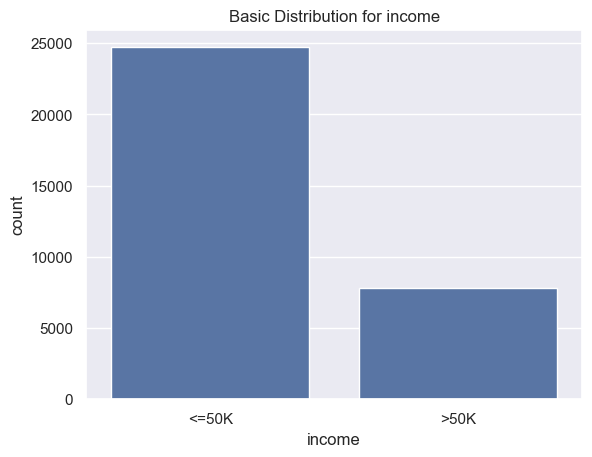

In [13]:
# https://stackoverflow.com/a/42409861
basicChart = sns.countplot(data=data, x="income")
basicChart.set_title("Basic Distribution for income")
plt.show()

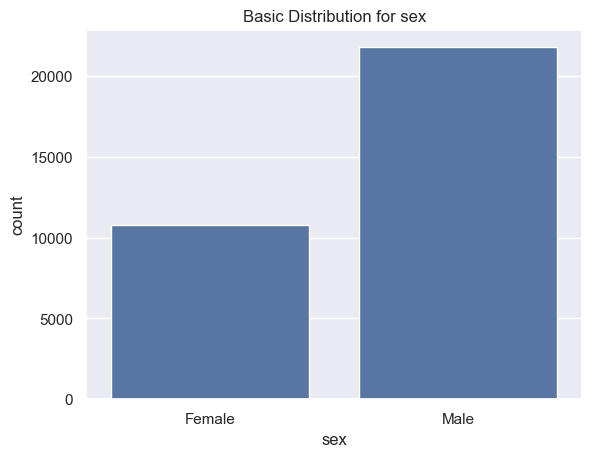

In [15]:
# https://stackoverflow.com/a/42409861
basicGenderChart = sns.countplot(data=data, x="sex")
basicGenderChart.set_title("Basic Distribution for sex")
plt.show()

Ok, so it looks like our dataset is biased toward men, with about twice as many men as women. Not sure why 

Ok, if we see any variables that don't have a similar distribution to this, then we'll know something's wrong!

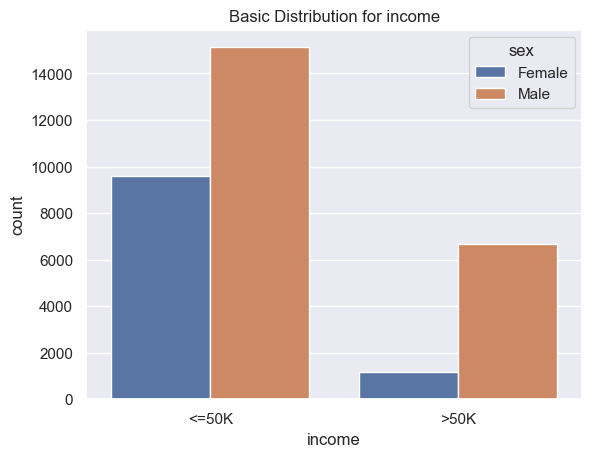

In [14]:
# https://stackoverflow.com/a/42409861
genderChart = sns.countplot(data=data, x="income", hue="sex")
genderChart.set_title("Basic Distribution for income")
plt.show()

Ok, this is already starting to look problematic. There are more men in both of the categories, which isn't necessarily problematic by itself (although it does raise questions of why women aren't working) but the ratios for these salaries are starting to look concerning. We can test this officially!

### Testing for Gender Bias

(As a stats major in undergrad, I'm just glad that I can finally use this!)

<https://online.stat.psu.edu/stat415/lesson/9/9.4>

We can formally test if men and women have different proportions by using this test statistic:

$Z=\dfrac{(\hat{p}_{\text{men}}-\hat{p}_{\text{women}})-0}{\sqrt{\hat{p}_{\text{overall}}(1-\hat{p}_{\text{overall}})\left(\dfrac{1}{n_1}+\dfrac{1}{n_2}\right)}}$,



#### $\hat{p}_\text{overall}$

In [28]:
# get the total number of people
peopleCount = data["income"].count()
print("Get the total number of people: ", peopleCount)

# Get the total number of people in each category
print("Get the total number of people in each category:")
salaryCounts = data["income"].value_counts()
print(salaryCounts)

# Get the total number of people making more than 50K
peopleOver50K = salaryCounts[">50K"]
print("Get the total number of people making more than 50k: ", peopleOver50K)

# Get the overall proportion
salaryProportion = peopleOver50K / peopleCount
print(f"Overall proportion making over >50k: {salaryProportion:.2%}")

Get the total number of people:  32561
Get the total number of people in each category:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64
Get the total number of people making more than 50k:  7841
Overall proportion making over >50k: 24.08%


#### $\hat{p}_\text{men}$

In [31]:
menData = data[data["sex"] == "Male"]

# get the total number of people
menCount = menData["income"].count()
print("Get the total number of people: ", menCount)

# Get the total number of people in each category
print("Get the total number of people in each category:")
menSalaryCounts = menData["income"].value_counts()
print(menSalaryCounts)

# Get the total number of people making more than 50K
menOver50K = menSalaryCounts[">50K"]
print("Get the total number of people making more than 50k: ", menOver50K)

# Get the overall proportion
menSalaryProportion = menOver50K / menCount
print(f"Overall proportion of men making over >50k: {menSalaryProportion:.2%}")

Get the total number of people:  21790
Get the total number of people in each category:
income
<=50K    15128
>50K      6662
Name: count, dtype: int64
Get the total number of people making more than 50k:  6662
Overall proportion of men making over >50k: 30.57%


#### $\hat{p}_\text{women}$

In [32]:
womenData = data[data["sex"] == "Female"]

# get the total number of people
womenCount = womenData["income"].count()
print("Get the total number of people: ", womenCount)

# Get the total number of people in each category
print("Get the total number of people in each category:")
womenSalaryCounts = womenData["income"].value_counts()
print(womenSalaryCounts)

# Get the total number of people making more than 50K
womenOver50K = womenSalaryCounts[">50K"]
print("Get the total number of people making more than 50k: ", womenOver50K)

# Get the overall proportion
womenSalaryProportion = womenOver50K / womenCount
print(f"Overall proportion of women making over >50k: {womenSalaryProportion:.2%}")

Get the total number of people:  10771
Get the total number of people in each category:
income
<=50K    9592
>50K     1179
Name: count, dtype: int64
Get the total number of people making more than 50k:  1179
Overall proportion of women making over >50k: 10.95%


Umm, this doesn't look great... Let's formally test it.

In [35]:
Z = (menSalaryProportion - womenSalaryProportion) / math.sqrt(
    salaryProportion * (1 - salaryProportion) * (1 / menCount + 1 / womenCount)
)
Z

38.972898531634414

I don't even need to calculate a formal probability for this... men and women do not get high salaries at the same rate.

### But why?

Maybe there's a different confounding variable here - maybe men and women have different rates of education, which affects earnings? Let's dig into this and see what other variables might be confounding us.

In [6]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
# https://stackoverflow.com/a/21711869
# I know performance probably isn't stellar, but there's so few rows it should probably be ok...
def categorizeIncome(row):
    return row["income"] == ">50K"


# this gives us 1 if it's high income; 0 otherwise
data["incomeCategory"] = data.apply(categorizeIncome, axis=1).astype(int)

In [18]:
educationGender = data.groupby(["education", "sex"])["incomeCategory"].mean()
educationGender = educationGender.reset_index()
educationGender

,education,sex,incomeCategory
0,10th,Female,0.010169
1,10th,Male,0.092476
2,11th,Female,0.018519
3,11th,Male,0.069987
4,12th,Female,0.027778
5,12th,Male,0.100346
6,1st-4th,Female,0.000000
7,1st-4th,Male,0.049180
8,5th-6th,Female,0.023810
9,5th-6th,Male,0.056225


This gives us the percentage of people in each category making more than $\$50K$. Let's visualize this...

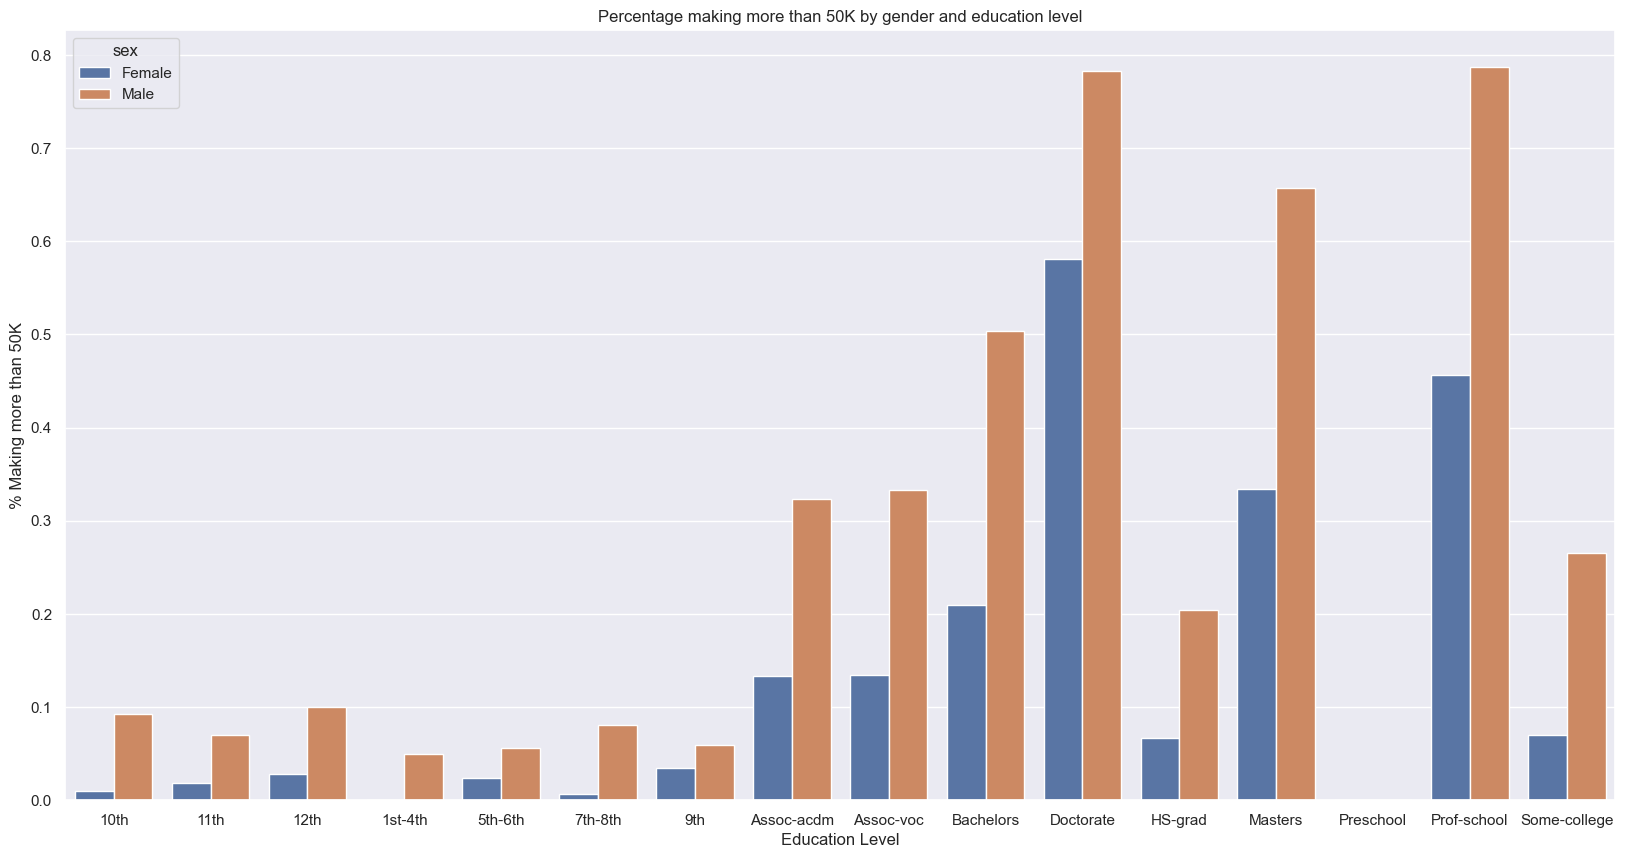

In [ ]:
plt.figure(figsize=(20, 10))
educationGenderChart = sns.barplot(
    educationGender, y="incomeCategory", x="education", hue="sex"
)
educationGenderChart.set_title(
    "Percentage making more than 50K by gender and education level"
)
educationGenderChart.set_xlabel("Education Level")
educationGenderChart.set_ylabel("% Making more than 50K")
plt.show()

There's no category where women have a higher salary than men...